In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

***12 étapes vers Navier–Stokes***
======
***

Bonjour! Bienvenue aux **12 étapes vers Navier–Stokes**. Il s'agit d'un module pratique qui est utilisé au début d'un cours interactif de dynamique des fluides numérique (CFD: computational fluid dynamics) enseigné par [Prof. Lorena Barba](http://lorenabarba.com) depuis le printemps 2009 à l'Université de Boston. Le cours ne suppose que des connaissances de base en programmation (dans n'importe quel langage) et bien sûr des bases en équations aux dérivées partielles et en mécanique des fluides. Le module pratique a été inspiré par les idées du Dr Rio Yokota, qui était post-doctorant dans le laboratoire de Barba, et a été affiné par le professeur Barba et ses étudiants au cours de plusieurs semestres d'enseignement du cours. Le cours est entièrement enseigné à l'aide de Python et les étudiants qui ne connaissent pas Python apprennent simplement au fur et à mesure que nous progressons dans le module.

Ce [bloc-notes Jupyter](https://jupyter-notebook.readthedocs.io/en/stable/) vous guidera à travers la première étape de la programmation de votre propre solveur Navier–Stokes en Python à partir de zéro. Nous allons plonger directement. Ne vous inquiétez pas si vous ne comprenez pas tout ce qui se passe au début, nous le couvrirons en détail au fur et à mesure que nous avancerons et vous pourrez soutenir votre apprentissage avec les vidéos de [Prof. Les conférences de Barba sur YouTube](http://www.youtube.com/playlist?list=PL30F4C5ABCE62CB61).

Pour de meilleurs résultats, après avoir suivi ce bloc-notes, préparez votre propre code pour l'étape 1, soit sous forme de script Python, soit dans un bloc-notes Jupyter propre.

Pour exécuter ce bloc-notes, nous supposons que vous avez invoqué le serveur de bloc-notes à l'aide de : jupyter notebook.

Etape 1:  Convection linéaire 1-D
-----
***

L'équation de convection linéaire 1-D est le modèle le plus simple et le plus basique qui peut être utilisé pour apprendre quelque chose sur la CFD. Il est étonnant que cette petite équation puisse nous apprendre autant ! C'est ici:

$$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$$

Avec des conditions initiales données (à comprendre comme une *onde*), l'équation représente la propagation de cette *onde* initiale avec une vitesse $c$, sans changement de forme. Soit la condition initiale 
$u(x,0)=u_0(x)$. Alors la solution exacte de l'équation est:

$$u(x,t)=u_0(x-ct)$$

Nous discrétisons cette équation à la fois dans l'espace et dans le temps, en utilisant le schéma de différence avant pour la dérivée temporelle et le schéma de différence arrière pour la dérivée spatiale. 
Considérons la discrétisation de la coordonnée spatiale $x$ en points que nous indexons de $i=0$ à $N$, et pas à pas dans des intervalles de temps discrets de taille $\Delta t$.

De la définition d'une dérivée (et en supprimant simplement la limite), nous savons que :


$$\frac{\partial u}{\partial x}\approx \frac{u(x+\Delta x)-u(x)}{\Delta x}$$
 
Notre équation discrète devient donc :

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0 $$

Où $n$ et $n+1$ sont deux pas consécutifs dans le temps, tandis que $i-1$ et $i$ sont deux points voisins de la coordonnée $x$ discrétisée. Si des conditions initiales sont données, alors la seule inconnue dans cette discrétisation est $u_i^{n+1}$. Nous pouvons résoudre notre inconnue pour obtenir une équation qui nous permet d'avancer dans le temps, comme suit :

$$u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)$$

Essayons maintenant de l'implémenter en Python.

Nous allons commencer par importer quelques bibliothèques pour nous aider.

* `numpy` est une bibliothèque qui fournit un tas d'opérations matricielles utiles similaires à MATLAB
* `matplotlib` est une bibliothèque de tracé 2D que nous utiliserons pour tracer nos résultats
* `time` and `sys` fournir des fonctions de synchronisation de base que nous utiliserons pour ralentir les animations pour la visualisation

In [2]:
# Rappel : les commentaires en python sont indiqués par le signe dièse
import numpy                       # ici on charge numpy
from matplotlib import pyplot      # ici nous chargeons matplotlib
import time, sys                   # ainsi que quelques utilitaires


In [3]:
#cela fait apparaître les tracés matplotlib dans le notebook (au lieu d'une fenêtre séparée)
%matplotlib inline                  

Définissons maintenant quelques variables ; nous voulons définir une grille de points régulièrement espacés dans un domaine spatial de longueur égale à `2`, c'est-à-dire 𝑥𝑖∈(0,2). Nous définirons une variable nx, qui sera le nombre de points de grille que nous voulons et dx sera la distance entre n'importe quelle paire de points de grille adjacents.



In [4]:
nx = 81  #  essayez de changer ce nombre de 41 à 81 et Run All ... que se passe-t-il ?
dx = 2 / (nx-1)
nt = 25    # nt est le nombre de pas de temps que nous voulons calculer
dt = .025  # dt est la durée couverte par chaque pas de temps (delta t)
c = 1      # supposons une vitesse d'onde c = 1

Nous devons également mettre en place nos conditions initiales. La vitesse initiale $𝑢_0$ est donnée par $𝑢=2$ dans l'intervalle $0.5 \leq x \leq 1$ et $𝑢=1$ partout ailleurs dans (0,2) (c'est-à-dire une fonction chapeau).
Ici, nous utilisons la fonction `ones()` définissant un tableau `numpy` qui est long de `nx` éléments avec chaque valeur égale à $1$.

In [5]:
u = numpy.ones(nx)      # la fonction ones() de numpy
u[int(.5 / dx):int(1 / dx + 1)] = 2  # on prend u = 2 entre 0,5 et 1 selon nos C.I.
print(u)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Examinons maintenant ces conditions initiales à l'aide d'un graphique Matplotlib. Nous avons importé la bibliothèque de traçage `matplotlib` `pyplot` et la fonction de traçage s'appelle `plot`, nous appellerons donc `pyplot.plot`. Pour en savoir plus sur les innombrables possibilités de Matplotlib, explorez la [Galerie](http://matplotlib.org/gallery.html) d'exemples de tracés.

Ici, nous utilisons la syntaxe d'un tracé 2D simple : `plot(x,y)`, où les valeurs `x` sont des points de grille uniformément répartis :

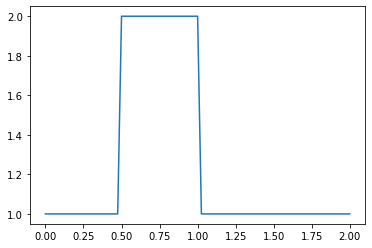

In [6]:
pyplot.plot(numpy.linspace(0, 2, nx), u);

Pourquoi la fonction chapeau n'a-t-elle pas des côtés parfaitement droits ? Réfléchissez un peu.



Il est maintenant temps d'implémenter la discrétisation de l'équation de convection en utilisant un schéma aux différences finies.

Pour chaque élément de notre tableau `u`, nous devons effectuer l'opération $u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i -1}^n)$


Nous stockerons le résultat dans un nouveau tableau (temporaire) `un`, qui sera la solution $u$ pour le prochain pas de temps. Nous répéterons cette opération pour autant de pas de temps que nous spécifierons et nous pourrons alors voir jusqu'où l'onde a convecté.

Nous initialisons d'abord notre tableau d'espace réservé `un` pour contenir les valeurs que nous calculons pour le pas de temps $n + 1$, en utilisant à nouveau la fonction NumPy `ones()`.

Ensuite, nous pouvons penser que nous avons deux opérations itératives : une dans l'espace et une dans le temps (nous apprendrons différemment plus tard), alors nous commencerons par imbriquer une boucle dans l'autre. Notez l'utilisation de la fonction astucieuse `range()`. Lorsque nous écrivons : `for i in range(1,nx)` nous parcourrons le tableau `u`, mais nous sauterons le premier élément (le zéro-ième élément). *Pourquoi?*

In [7]:
un = numpy.ones(nx) #initialize a temporary array

for n in range(nt):  #loop for values of n from 0 to nt, so it will run nt times
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx): ## you can try commenting this line and...
    #for i in range(nx): ## ... uncommenting this line and see what happens!
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
        
        

**Remarque** : nous apprendrons plus tard que le code tel qu'il est écrit ci-dessus est assez inefficace et qu'il existe de meilleures façons de l'écrire, à la manière de Python. Mais continuons.

Essayons maintenant de tracer notre tableau `u` après avoir avancé dans le temps.

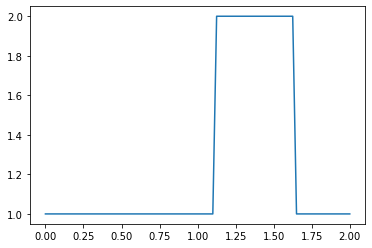

In [8]:
pyplot.plot(numpy.linspace(0, 2, nx), u);

D'ACCORD! Donc, notre fonction de chapeau s'est définitivement déplacée vers la droite, mais ce n'est plus un chapeau. **Que se passe-t-il?**

Apprendre encore plus
-----
***

Pour une explication plus approfondie de la méthode des différences finies, y compris des sujets tels que l'erreur de troncature, l'ordre de convergence et d'autres détails, regardez **Leçons 2 et 3** du professeur Barba sur YouTube.

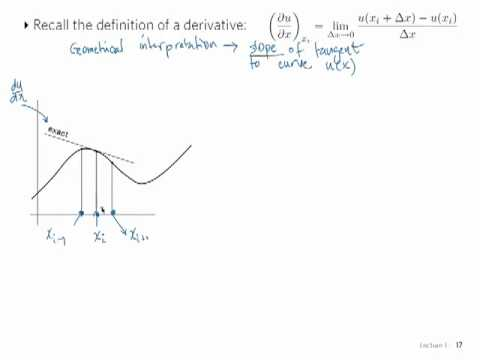

In [9]:
from IPython.display import YouTubeVideo
YouTubeVideo('iz22_37mMkk')

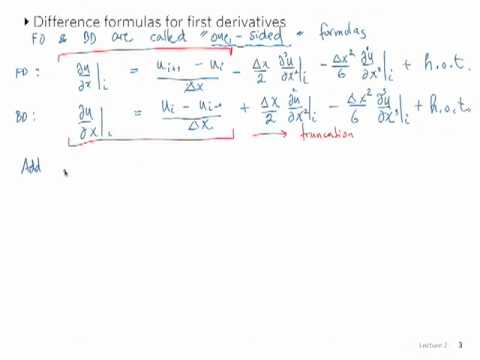

In [10]:
YouTubeVideo('xq9YTcv-fQg')

Pour une présentation détaillée de la discrétisation de l'équation de convection linéaire aux différences finies (et également des étapes suivantes, jusqu'à l'étape 4), regardez la leçon 4 du professeur Barba sur YouTube.

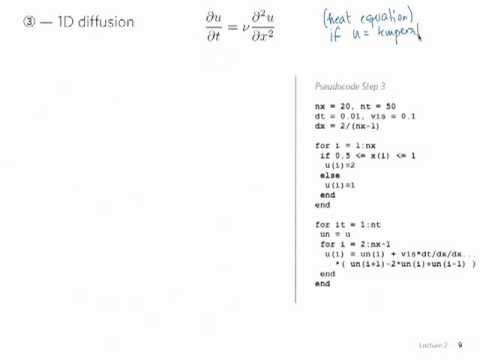

In [11]:
YouTubeVideo('y2WaK7_iMRI')

## Enfin et surtout

**N'oubliez pas** de réécrire l'étape 1 sous la forme d'un nouveau script Python ou dans *votre propre* bloc-notes Jupyter, puis expérimentez en modifiant les paramètres de discrétisation. Une fois que vous avez fait cela, vous serez prêt pour [Étape 2](./02_FR_Step_2.ipynb).

***